In [ ]:
from dataset.lowlevel_PromtGIP_dataloader import DatasetLowlevel_Train
from dataset.data_utiles import load_config
config = load_config("./config/xrestormer.yaml")
dataset_train = DatasetLowlevel_Train(dataset_path='/mnt/petrelfs/zhaoxiangyu1/data/Test100_256', 
                                    input_size=256,
                                    phase = 'train',
                                    split='training',
                                    **config["dataset"])

In [ ]:
a, b = dataset_train.__getitem__(12899)
print(a[2].shape)

import torch
data_loader_train = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=6,
    num_workers=2,
    drop_last=True,
)


In [ ]:
data_loader_i = iter(data_loader_train)
(batch, _) = next(data_loader_i)
print(batch.type)
isinstance(batch, tuple)
not isinstance(batch, list)

In [ ]:
from petrel_client.client import Client
import io
import numpy as np
client = Client(conf_path="~/petreloss.conf")

data_type=['vis']
frame_id = 48
data_all = []
for itme in data_type:
    path = f"s3://sevir_pair/{itme}/2018/R18032903207578.npy"
    data = io.BytesIO(client.get(path))
    data = np.load(data)
    data = data[:, :, frame_id]
    if itme == "vis":
        print(data)
    data_all.append(data)

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(data_all[0], cmap='gray')
plt.title('VIS Data')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(data_all[1], cmap='inferno')
plt.title('ir069 Data')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(data_all[2], cmap='inferno')
plt.title('ir107 Data')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(data_all[3], cmap='viridis')
plt.title('VIL Data')
plt.colorbar()

plt.tight_layout()
plt.show()

In [70]:
import dataset.lowlevel_PromtGIP_dataloader as lowlevel_prompt_dataloader
from dataset.rainnet_dataloader import RainNetDataset
import torch
from dataset.apd_dataloader import APDataset
from dataset.satellite_dataloader import MyDataset

In [71]:
dataset_train = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='sevir',input_size=256,phase = 'train',task='sevir')
dataset_train2 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='ir_trans',input_size=256,phase = 'train',task='trans')
dataset_train3 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='inter',input_size=256,phase = 'train',task='inter')
dataset_train4 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='down_scaling_vil',input_size=256,phase = 'train',task='down_scaling')
dataset_train5 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='vis_recon',input_size=256,
                                                                   phase='train',task='vis_recon')
dataset_train_4c = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='predict',input_size=256,
                                                                   phase = 'train',task='predict')
dataset_dblur = lowlevel_prompt_dataloader.Dataset_dblur(split='train')
dataset_apd = APDataset(split='train')
my_dataset = MyDataset('train')
dataset = dataset_train+dataset_train2+dataset_train3

dataset_val1 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='sevir',input_size=256,
                                                                phase='val',task='sevir')
dataset_val2 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='ir_trans',input_size=256,
                                                                phase='val',task='trans')
dataset_val3 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='inter',input_size=256,
                                                                phase='val',task='inter')
dataset_val4 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='down_scaling_vil',input_size=256,
                                                                phase='val',task='down_scaling')
dataset_val5 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='predict',input_size=256,
                                                                phase='val',task='predict')   

SEVIR train number: 240000
preparing data ...

my_level    TD    TS    C1   C2   C3   C4   C5  Total
Train     2907  3281   786  448  331  318   82   8153
Valid      942  1072   272  127  120  112   46   2691
Test       905  1120   257  169  129   91   32   2703
Total     4754  5473  1315  744  580  521  160  13547

ATCF_ID_list_train ∩ valid: set()
ATCF_ID_list_train ∩ test: set()
ATCF_ID_list_valid ∩ test: set()
ATCF_ID_list_test includes ATCF ID in must_in_test: True

min:
min_C07: 172.752
min_C08: 172.197
min_C09: 172.296
min_C10: 175.511
min_C12: 179.553
min_C13: 175.560
min_C14: 176.295
min_C15: 174.172
min_C16: 170.838
min_pct37: 138.643
min_pct89: 54.002
min_precip: 0.000
min_terra: 0.000

max:
max_C07: 359.456
max_C08: 324.413
max_C09: 316.124
max_C10: 290.336
max_C12: 284.381
max_C13: 318.761
max_C14: 317.384
max_C15: 319.212
max_C16: 299.252
max_pct37: 350.559
max_pct89: 320.947
max_precip: 147.140
max_terra: 7891.156



In [76]:
import torch
from get_example import *
def get_batch_by_id(data_loader, batch_id):
    for i, batch in enumerate(data_loader):
        if i == batch_id:
            return batch
    raise IndexError(f"Batch ID {batch_id} out of range.")

data_loader_val1 = torch.utils.data.DataLoader(
    dataset_val5,
    batch_size=1,
    num_workers=0,
    pin_memory=True,
    drop_last=False,
)


batch, data_type = get_batch_by_id(data_loader_val1, 0)
batch

{'input_query_img1': tensor([[[[-0.7034, -0.7034, -0.7034,  ..., -0.5943, -0.5864, -0.5943],
           [-0.7034, -0.7034, -0.7034,  ..., -0.5982, -0.5982, -0.5943],
           [-0.7034, -0.7034, -0.7034,  ..., -0.6022, -0.6153, -0.6035],
           ...,
           [-0.7034, -0.7034, -0.7034,  ..., -0.6613, -0.6613, -0.6613],
           [-0.7034, -0.7034, -0.7034,  ..., -0.6613, -0.6613, -0.6692],
           [-0.7034, -0.7034, -0.7034,  ..., -0.6613, -0.6692, -0.7008]],
 
          [[-0.7034, -0.7034, -0.7034,  ..., -0.5404, -0.5562, -0.5562],
           [-0.7034, -0.7034, -0.7034,  ..., -0.5562, -0.5562, -0.5680],
           [-0.7034, -0.7034, -0.7034,  ..., -0.5562, -0.5562, -0.5562],
           ...,
           [-0.7034, -0.7034, -0.7034,  ..., -0.6600, -0.6613, -0.6613],
           [-0.7034, -0.7034, -0.7034,  ..., -0.6613, -0.6613, -0.6692],
           [-0.7034, -0.7034, -0.7034,  ..., -0.6613, -0.6692, -0.7008]],
 
          [[-0.7034, -0.7034, -0.7034,  ..., -0.6311, -0.6403, -0.

In [12]:
data_loader_val = torch.utils.data.DataLoader(
    dataset_val5,
    batch_size=8,
    num_workers=4,
    drop_last=True,
)

In [ ]:
import os
import io
import numpy as np
from petrel_client.client import Client

client = Client(conf_path="~/petreloss.conf")
a,b=dataset_dblur.__getitem__(239991)
a[1].shape
# ceph_root = 's3://gongjunchao/radar_deblur/blur_data/I10O12/sevir/incepu/TimeStep12'
# ceph_root2 = 's3://gongjunchao/radar_deblur_4long/train/I10O12/sevir/EarthFormer/TimeStep'
# file_path = os.path.join(ceph_root2+str(11), 'pred_35000.npy')
# file_path
# f = io.BytesIO(client.get(file_path))
# frame_data = np.load(f)
# frame_data.shape

In [ ]:
zscore_normalizations_sevir = {
    'vil':{'scale':47.54,'shift':33.44},
    'ir069':{'scale':1174.68,'shift':-3683.58},
    'ir107':{'scale':2562.43,'shift':-1552.80},
    'lght':{'scale':0.60517,'shift':0.02990},
    'vis':{'scale':2259.96,'shift':-1347.91}
}
from util.display import get_cmap
import matplotlib.pyplot as plt
vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)

low = a[0][0]*zscore_normalizations_sevir['ir069']['scale']+zscore_normalizations_sevir['ir069']['shift']
high = a[0][1]*zscore_normalizations_sevir['ir107']['scale']+zscore_normalizations_sevir['ir107']['shift']
vis = a[1][0]*zscore_normalizations_sevir['vis']['scale']+zscore_normalizations_sevir['vis']['shift']

plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
plt.imshow(low, cmap=ir069_cmap, norm=ir069_norm)
plt.title('vil_pred Data')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(high, cmap=ir107_cmap, norm=ir107_norm)
plt.title('vil_pred Data')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(vis, cmap=vis_cmap, norm=vis_norm)
plt.title('vil_pred Data')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from dataset.image_operators import *
dataset = RainNetDataset('train', frame=4, is_crop=True)
a,b=dataset.__getitem__(0)
a[0].shape
# in_data = np.expand_dims(cv2.resize(np.copy(a[0]), (256, 256),
#                                 interpolation=cv2.INTER_LINEAR), axis=2)
# out_data = cv2.resize(np.copy(a[1]), (256, 256),
#                                 interpolation=cv2.INTER_LINEAR)
# in_data.shape

In [ ]:
dataset_train5.__getitem__(0)[0][3].shape

In [ ]:
a,b=my_dataset.__getitem__(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 4))
plt.subplot(1, 6, 1)
plt.imshow(a[0][0], cmap='inferno')
plt.title('Mask Map')
plt.colorbar()

plt.subplot(1, 6, 2)
plt.imshow(a[0][1], cmap='inferno')
plt.title('C07 Data')
plt.colorbar()

plt.subplot(1, 6, 3)
plt.imshow(a[0][2], cmap='inferno')
plt.title('C13 Data')
plt.colorbar()

plt.subplot(1, 6, 4)
plt.imshow(a[0][3], cmap='inferno')
plt.title('C16 Data')
plt.colorbar()

plt.subplot(1, 6, 5)
plt.imshow(a[1][0], cmap='inferno')
plt.title('pct37 Data')
plt.colorbar()

plt.subplot(1, 6, 6)
plt.imshow(a[1][1], cmap='inferno')
plt.title('pct89 Data')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
dataset_apd.__getitem__(0)

In [ ]:
dataset_train.__getitem__(0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dataset_dblur.__getitem__(0)['inputs'][0], cmap='viridis')
plt.title('in Data')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(dataset_dblur.__getitem__(0)['data_samples'][0], cmap='inferno')
plt.title('out Data')
plt.colorbar()

plt.tight_layout()
plt.show()


In [5]:
data_loader_i = iter(data_loader2)

In [ ]:
print(data_loader_i)
batch,type_d = next(data_loader_i)
type_d

In [ ]:
batch[0].shape

In [19]:
from petrel_client.client import Client
import io
import netCDF4 as nc
import json
client = Client(conf_path="~/petreloss.conf")
path = 's3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/GEOS_V2'

content1 = client.list('s3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/GEOS_V2')
content2 = client.list('s3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/TROPOMI_V2/daily')
content3 = client.list('s3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/GEMS_V2/daily')

In [ ]:
GEOS_V2_list=[]
for i in content1:
    GEOS_V2_list.append(i[5:-4])
GEOS_V2_list[0]
# with open('output.json', 'w') as file:
#     json.dump(data_list, file)

In [ ]:
import os
import numpy as np
npy_files = os.path.join('s3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/GEOS_V2','GEOS_'+GEOS_V2_list[0]+'.npy')
print(npy_files)
print(io.BytesIO(client.get(npy_files)))
GEMS = np.load(io.BytesIO(client.get(npy_files)))
GEMS

In [ ]:
a=json.load(open('/mnt/petrelfs/zhaoxiangyu1/code/weather_prompt_new/dataset/co2_list.json'))
len(a)

In [ ]:
GEMS_V2_list=[]
for i in content3:
    GEMS_V2_list.append(i[5:-3])
len(GEMS_V2_list)
GEMS_V2_list[0]
# with open('output.json', 'w') as file:
#     json.dump(data_list, file)

In [ ]:
TROPOMI_V2_list=[]
for i in content2:
    TROPOMI_V2_list.append(i[8:-3])
TROPOMI_V2_list[0]

In [25]:
intersection_list = [item for item in GEOS_V2_list if item in GEMS_V2_list and item in TROPOMI_V2_list]

In [30]:
with open('/mnt/petrelfs/zhaoxiangyu1/code/weather_prompt_new/dataset/co2_list.json', 'w') as file:
    json.dump(intersection_list, file)

In [ ]:
GEMS_V2_list[17819]

In [ ]:
import os
import netCDF4
nc_files = os.path.join('s3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/GEMS_V2/daily', GEMS_V2_list[0])
print(nc_files)
GEMS = io.BytesIO(client.get(nc_files))
GEMS = netCDF4.Dataset('ads.nc', memory=GEMS.read())
GEMS

In [ ]:
TROPOMI_V2_list=[]
for i in content3:
    TROPOMI_V2_list.append(i[8:-3])
len(TROPOMI_V2_list)
# with open('output.json', 'w') as file:
#     json.dump(data_list, file)

In [3]:
import io
import netCDF4 as nc
path = 's3://atmospheric_chemistry//media/PJLAB\wangzhengyi/air/V2_crop/GEMS_V2/daily/GEMS_20210101_0128_0128.nc'

from petrel_client.client import Client

conf_path = '~/petreloss.conf'

client = Client(conf_path)

GEMS = io.BytesIO(client.get(path))
GEMS = nc.Dataset('inmemory.nc', memory=GEMS.read())
VCD_GEMS=GEMS.variables['VCD'][:]

In [1]:
from petrel_client.client import Client
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset

from evaluate.add_degradation_various import *
from dataset.image_operators import *

import warnings
from torch.utils.data import Dataset
import os
import sys
import time
from timeit import default_timer as timer
import einops

from dataset.data_utiles import *
import dataset.util as util
import pandas as pd

client = Client(conf_path="~/petreloss.conf")

In [5]:
zscore_normalizations_sevir = {
    'vil':{'scale':47.54,'shift':33.44},
    'ir069':{'scale':1174.68,'shift':-3683.58},
    'ir107':{'scale':2562.43,'shift':-1552.80},
    'lght':{'scale':0.60517,'shift':0.02990},
    'vis':{'scale':2259.96,'shift':-1347.91}
}

catalog = pd.read_csv('dataset/output.csv', low_memory=False)
img_types = set(['vis','ir069','ir107','vil'])
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())[:11458]

In [ ]:
def get_line_time(value):
    row = catalog.loc[catalog['id'] == value].iloc[0]
    time = row['file_name'].split('/')[1]
    return time
max_score = 0
num = 0
for item in event_ids:
    num = num+1
    event_time = get_line_time(item)
    path = f"s3://sevir_pair/vil/{event_time}/{item}.npy"
    data = io.BytesIO(client.get(path))
    data = torch.from_numpy(np.load(data))
    for i in range(36,48):
        has_event_target = (data[:,:,i] >= 180)
        high_score = int(torch.sum(has_event_target))
        if high_score > max_score:
            max_score = high_score
            marked_event = item
            marked_frame = i
    if num == 20:
        print('saving...', marked_event)
        num = 0
        max_score = 0
        target_event_time = get_line_time(marked_event)
        path1 = f"s3://sevir_pair/vil/{target_event_time}/{marked_event}.npy"
        path2 = f"s3://sevir_pair/ir069/{target_event_time}/{marked_event}.npy"
        path3 = f"s3://sevir_pair/ir107/{target_event_time}/{marked_event}.npy"
        path4 = f"s3://sevir_pair/vis/{target_event_time}/{marked_event}.npy"
        target_data = io.BytesIO(client.get(path1))
        target_data = np.load(target_data)
        frame_id = marked_frame-36
        data_list = [frame_id, frame_id+6, frame_id+12, frame_id+18, frame_id+24, frame_id+36]
        target_data = target_data[:, :, data_list]
        target_data = (target_data-zscore_normalizations_sevir['vil']['shift'])/zscore_normalizations_sevir['vil']['scale']
        np.save(f'/mnt/petrelfs/zhaoxiangyu1/data/sevir_prompt/vil/{marked_event}.npy', target_data, allow_pickle=True)
        
        target_data2 = io.BytesIO(client.get(path2))
        target_data2 = np.load(target_data2)
        target_data2 = target_data2[:, :, marked_frame]
        target_data2 = (target_data2-zscore_normalizations_sevir['ir069']['shift'])/zscore_normalizations_sevir['ir069']['scale']
        np.save(f'/mnt/petrelfs/zhaoxiangyu1/data/sevir_prompt/ir069/{marked_event}.npy', target_data2, allow_pickle=True)

        target_data3 = io.BytesIO(client.get(path3))
        target_data3 = np.load(target_data3)
        target_data3 = target_data3[:, :, marked_frame]
        target_data3 = (target_data3-zscore_normalizations_sevir['ir107']['shift'])/zscore_normalizations_sevir['ir107']['scale']
        np.save(f'/mnt/petrelfs/zhaoxiangyu1/data/sevir_prompt/ir107/{marked_event}.npy', target_data3, allow_pickle=True)

        target_data4 = io.BytesIO(client.get(path4))
        target_data4 = np.load(target_data4)
        target_data4 = target_data4[:, :, marked_frame]
        target_data4 = (target_data4-zscore_normalizations_sevir['vis']['shift'])/zscore_normalizations_sevir['vis']['scale']
        np.save(f'/mnt/petrelfs/zhaoxiangyu1/data/sevir_prompt/vis/{marked_event}.npy', target_data4, allow_pickle=True)

In [ ]:
a=np.load('/mnt/petrelfs/zhaoxiangyu1/data/sevir_prompt/vis/R18032412507983.npy')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(a[:,:], cmap='grey')
plt.title('in Data')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(a[:,:], cmap='grey')
plt.title('out Data')
plt.colorbar()

plt.tight_layout()
plt.show()

In [13]:
import dataset.lowlevel_PromtGIP_dataloader as lowlevel_prompt_dataloader
import torch

In [69]:
dataset_val13 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='ir_trans',input_size=256,
                                                                phase='val',task='ir107_trans_ir069')
dataset_val14 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='ir_predict',input_size=256,
                                                                phase='val',task='vis_predict')
dataset_val15 = lowlevel_prompt_dataloader.DatasetSevir_Train(data_path='ir_predict',input_size=256,
                                                                phase='val',task='ir107_predict')


NameError: name 'lowlevel_prompt_dataloader' is not defined

In [16]:
a,b=dataset_val14.__getitem__(0)
a['input_query_img1'].shape

torch.Size([4, 256, 256])

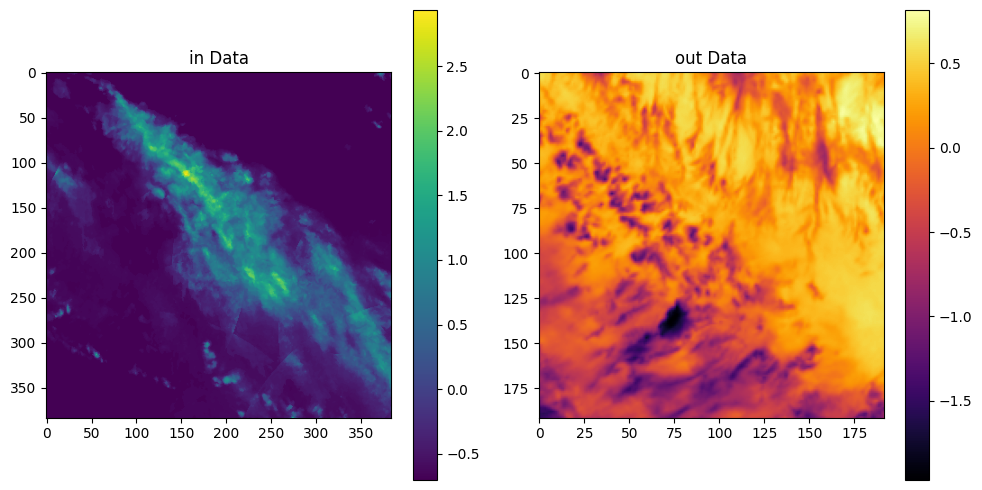

In [84]:
import os
path = '/mnt/petrelfs/zhaoxiangyu1/data/sevir_prompt_random'
prompt_base = os.listdir(path+'/vil')
prompt_base.sort()
event_id=prompt_base[8]

import numpy as np
import matplotlib.pyplot as plt

ir069_in = np.load(path+'/ir069/'+str(event_id))
ir107_in = np.load(path+'/ir107/'+str(event_id))
vil_out = np.load(path+'/vil/'+str(event_id))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(vil_out[:,:,-1], cmap='viridis')
plt.title('in Data')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(ir069_in, cmap='inferno')
plt.title('out Data')
plt.colorbar()

plt.tight_layout()
plt.show()


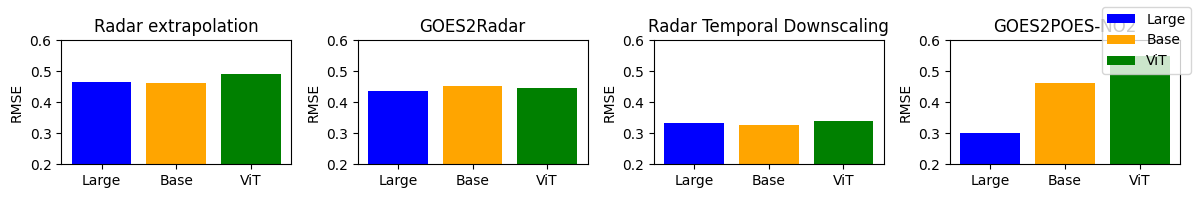

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
tasks = ['Radar extrapolation', 'GOES2Radar', 'Radar Temporal Downscaling', 'GOES2POES-NO2']
models = ['Large', 'Base', 'ViT']
data = {
    'Radar extrapolation': [[0.467,0.2516], [0.461,0.2348] [0.490,0.2196]],
    'GOES2Radar': [[ 0.436,0.2916] [0.452,0.2788], [0.445,0.2685]],
    'Radar Temporal Downscaling': [[0.334, 0.327, 0.341]],
    'GOES2POES-NO2': [0.302, 0.463, 0.549]
}

# 颜色
colors = ['blue', 'orange', 'green']

# 创建一个包含4个子图的图形
fig, axs = plt.subplots(1, 4, figsize=(12, 2))

# 绘制每个任务的直方图
for i, task in enumerate(tasks):
    ax = axs[i]
    indices = np.arange(len(models))
    values = data[task]
    
    # 绘制直方图
    bars = ax.bar(indices, values, color=colors)
    
    # 设置子图标题和标签
    ax.set_title(task)
    ax.set_xticks(indices)
    ax.set_xticklabels(models)
    ax.set_ylim(0.2, 0.6)
    ax.set_ylabel('RMSE')

# 添加图例
fig.legend(bars, models, loc='upper right')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

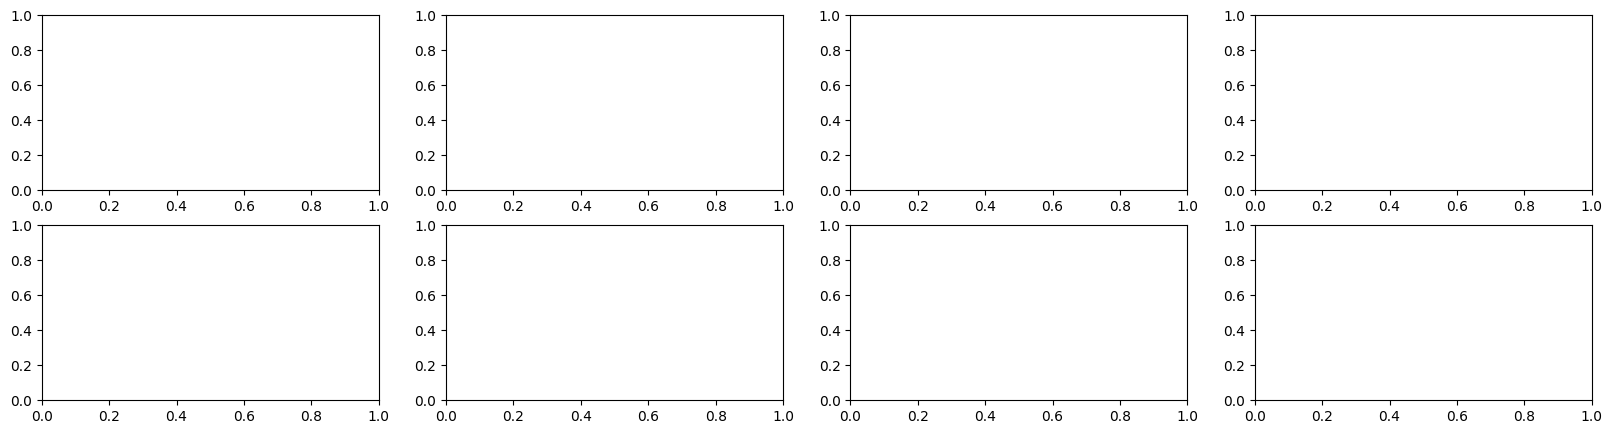

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
tasks = ['Radar extrapolation', 'GOES2Radar', 'Radar Temporal Downscaling', 'Radar Spatial Downscaling']

indicator1 = {
    'Radar extrapolation': [0.2196, 0.2348,0.2516],
    'GOES2Radar': [0.2685,0.2788,0.2916],
    'Radar Temporal Downscaling': [ 0.3725, 0.3723, 0.3780],
    'Radar Spatial Downscaling': [0.5336, 0.5127,  0.542]
}

indicator2 = {
    'Radar extrapolation': [0.490, 0.461, 0.467],
    'GOES2Radar': [0.445,0.452,0.436],
    'Radar Temporal Downscaling': [0.333, 0.332, 0.327],
    'Radar Spatial Downscaling': [0.1201, 0.1361, 0.121 ]
}


models = ['ViT', 'Base', 'Large']

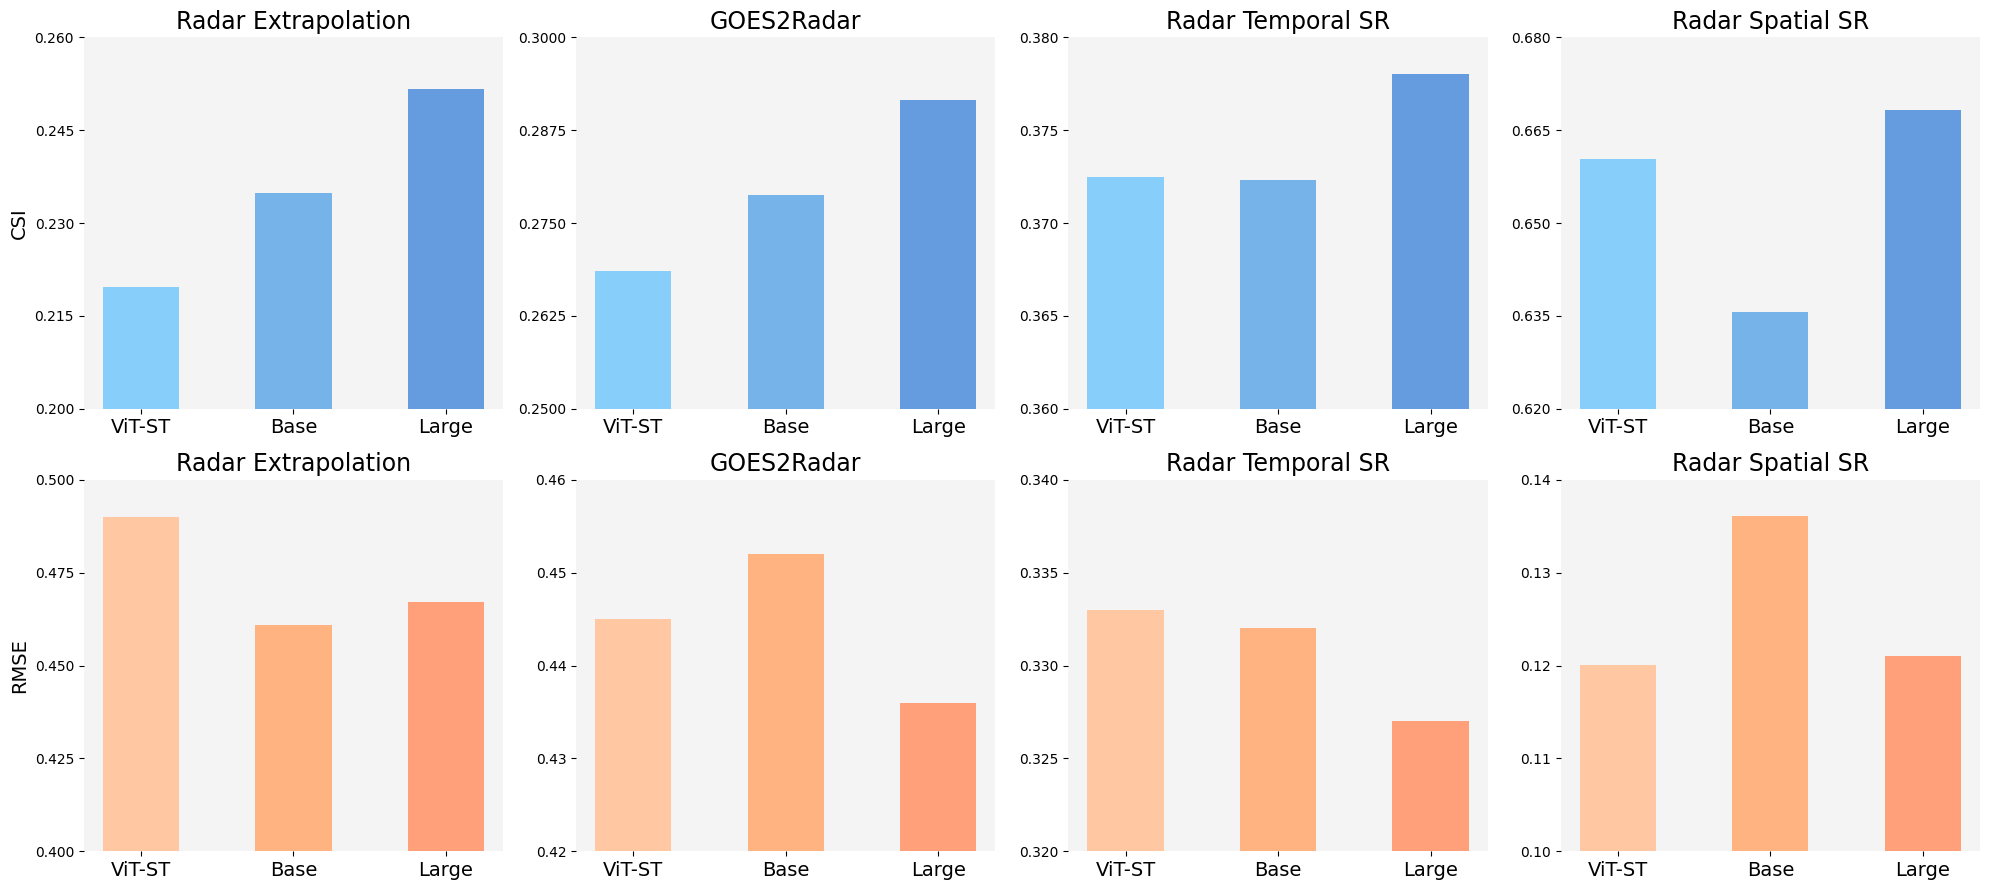

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
tasks1=['Radar Extrapolation', 'GOES2Radar', 'Radar Temporal SR', 'Radar Spatial SR', 'Radar Extrapolation', 'GOES2Radar', 'Radar Temporal SR', 'Radar Spatial SR']
tasks2=['Radar extrapolation', 'GOES2Radar', 'Radar Temporal Downscaling', 'Radar Spatial Downscaling']
models = ['ViT-ST', 'Base', 'Large']
indicator1 = {
    'Radar Extrapolation': [0.2196, 0.2348,0.2516],
    'GOES2Radar': [0.2685,0.2788,0.2916],
    'Radar Temporal SR': [ 0.3725, 0.3723, 0.3780],
    'Radar Spatial SR': [0.6604, 0.6357,  0.6682]
}

indicator2 = {
    'Radar Extrapolation': [0.490, 0.461, 0.467],
    'GOES2Radar': [0.445,0.452,0.436],
    'Radar Temporal SR': [0.333, 0.332, 0.327],
    'Radar Spatial SR': [0.1201, 0.1361, 0.121 ]
}

# 颜色
colors1 = ['#87CEFB', '#76B3E8', '#659BDF']
colors2 = ['#FFC8A2', '#FFB380', '#FFA07A']

# 创建一个包含8个子图的图形，2行4列
fig, axs = plt.subplots(2, 4, figsize=(20, 9))

# 绘制每个任务的直方图
for i, task in enumerate(tasks1):
    ax = axs[i // 4, i % 4]
    indices = np.arange(len(models))
    if i<4:
        values = indicator1[task]
    else:
        values = indicator2[task]
    
    # 绘制直方图
    if i<4:
        bars = ax.bar(indices, values, color=colors1, width=0.5, linewidth=1.5, alpha=1)
    else:
        bars = ax.bar(indices, values, color=colors2, width=0.5, linewidth=1.5, alpha=1)
    # 设置子图标题和标签
    # if i<4:
    ax.set_title(task, fontsize=17)
    ax.set_xticks(indices)
    ax.set_xticklabels(models, fontsize=14)
    if i == 0:
        ax.set_ylim(0.2, 0.26)
        yticks = [0.2, 0.215, 0.23, 0.245, 0.26]
        ax.set_yticks(yticks)
    elif i==1:
        ax.set_ylim(0.25, 0.3)
        yticks = [0.25, 0.2625, 0.2750, 0.2875, 0.300]
        ax.set_yticks(yticks)
    elif i==2:
        ax.set_ylim(0.36, 0.38)
        yticks = [0.36, 0.365, 0.37, 0.375, 0.380]
        ax.set_yticks(yticks)        
    elif i==3:
        ax.set_ylim(0.62, 0.68)
        yticks = [0.62, 0.635, 0.65, 0.665, 0.680]
        ax.set_yticks(yticks)
    elif i==4:
        ax.set_ylim(0.4, 0.5)
        yticks = [0.4, 0.425, 0.45, 0.475, 0.5]
        ax.set_yticks(yticks)
    elif i==5:
        ax.set_ylim(0.42, 0.46)
        yticks = [0.42, 0.43, 0.44, 0.45, 0.46]
        ax.set_yticks(yticks)
    elif i==6:
        ax.set_ylim(0.32, 0.34)
        yticks = [0.32, 0.325, 0.33, 0.335, 0.34]
        ax.set_yticks(yticks)
    elif i==7:
        ax.set_ylim(0.1, 0.14)
        yticks = [0.1, 0.11, 0.12, 0.13, 0.14]
        ax.set_yticks(yticks)
    else:
        ax.set_ylim(0, 1)
    if i==0:
        ax.set_ylabel('CSI', fontsize=14)
    elif i==4:
        ax.set_ylabel('RMSE', fontsize=14)
    
    # 设置子图背景颜色为灰色
    ax.set_facecolor((0.8, 0.8, 0.8, 0.2))
    
    # 去掉子图的黑色边框
    for spine in ax.spines.values():
        spine.set_visible(False)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()